# Домашна задача 2
## Моделирање и симулација 2018/2019
### Андреј Јанчевски - 151003

<font color="green">**1. Имплементација на метод за генерирање на секвенци од вредности на функцијатa за греење $f$ од диференцијалната равенка**</font>
$$
\frac{dT}{dt} = - \alpha T + f(t)\\
$$
$$
f(t) = A + B \sin{\frac{2 \pi (t-\phi_{година})}{T_{година}}} + C \sin{\frac{2 \pi(t-\phi_{ден})}{T_{ден}}}
$$
$$
T_{година}=365\cdot24\textrm{h}=8760\textrm{h}\\
T_{ден}=24\textrm{h}\\
\phi_{година} = 100\cdot24\textrm{h}=2400\textrm{h}\\
\phi_{ден} = 6\textrm{h}
$$

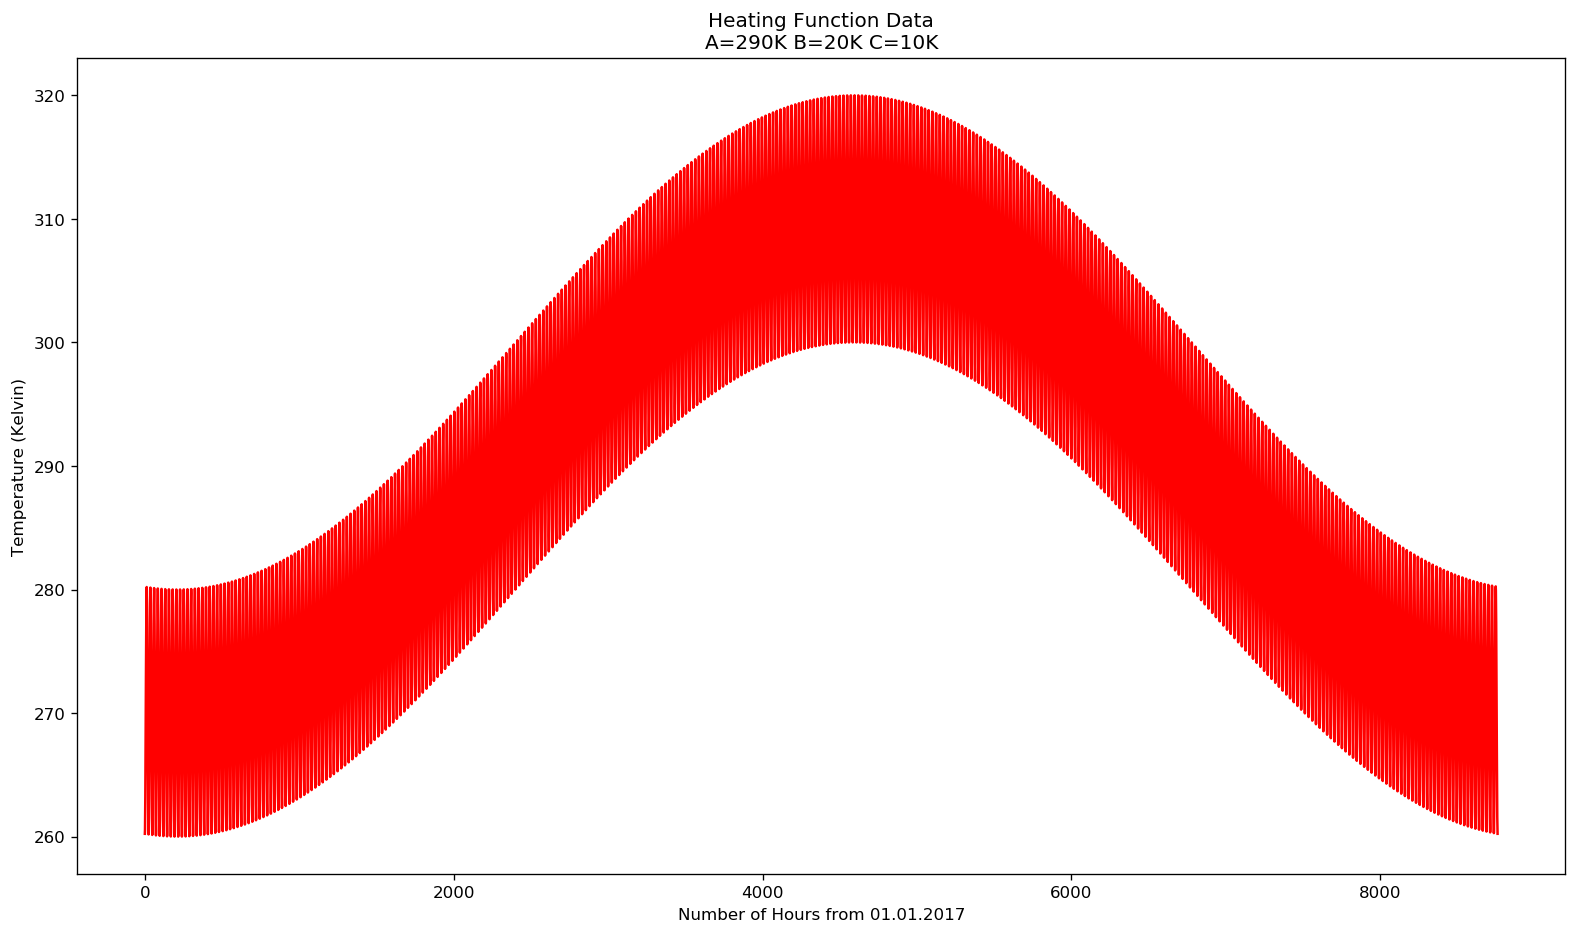

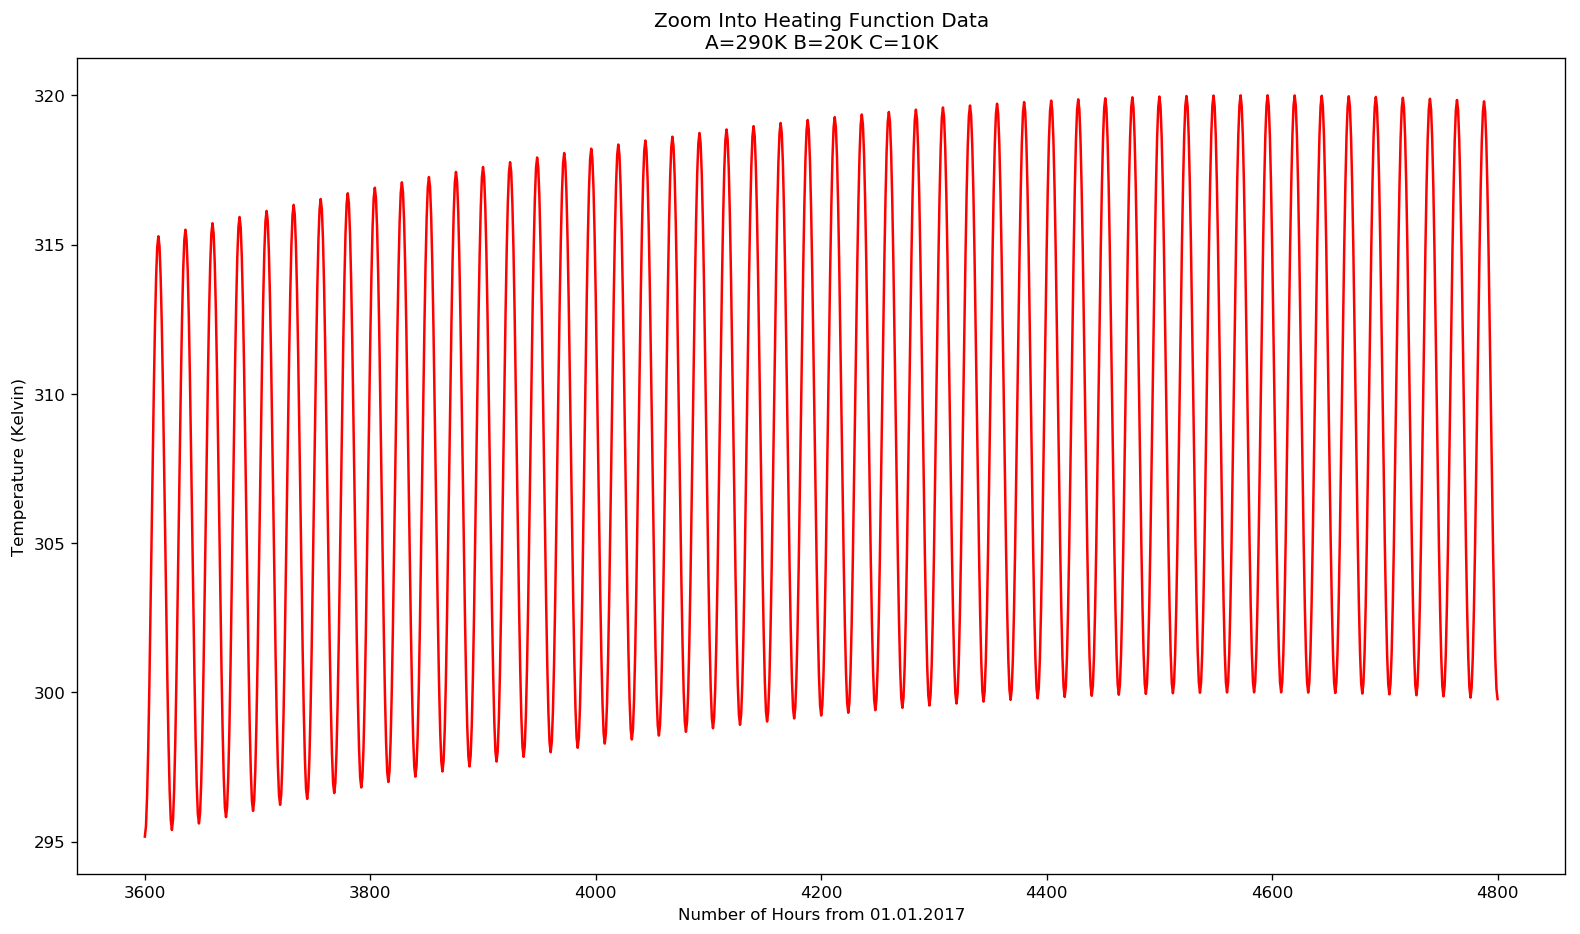

In [125]:
import numpy as np
from matplotlib import pyplot as plt
import datetime
import pandas

t_godina = 24 * 365
t_den = 24


def heating_function(t, a, b, c):
    phi_godina = 24 * 100
    phi_den = 6
    return a + b * np.sin(
        (2 * np.pi * (t - phi_godina)) / t_godina, dtype=float) + c * np.sin(
            (2 * np.pi * (t - phi_den)) / t_den, dtype=float)


def get_heating_function_data(a, b, c, time_range):
    return [heating_function(t, a, b, c) for t in time_range]


time_range = np.arange(0 * 24, 365 * 24 + 1, 1)
heating_data = get_heating_function_data(290, 20, 10, time_range)
plt.figure(1, figsize=(16, 9), dpi=1920 / 16)
plt.title("Heating Function Data\nA=290K B=20K C=10K")
plt.plot(time_range, heating_data, color="red", linestyle="solid")
plt.xlabel("Number of Hours from 01.01.2017")
plt.ylabel("Temperature (Kelvin)")
plt.show()

time_range = np.arange(150 * 24, 200 * 24 + 1, 1)
heating_data = get_heating_function_data(290, 20, 10, time_range)
plt.figure(2, figsize=(16, 9), dpi=1920 / 16)
plt.title("Zoom Into Heating Function Data\nA=290K B=20K C=10K")
plt.plot(time_range, heating_data, color="red", linestyle="solid")
plt.xlabel("Number of Hours from 01.01.2017")
plt.ylabel("Temperature (Kelvin)")
plt.show()

<font color="green">**2. Имплементација на Ојлеровиот метод за да се реши диференцијалната равенка и да се добие модел за температурата.**</font>

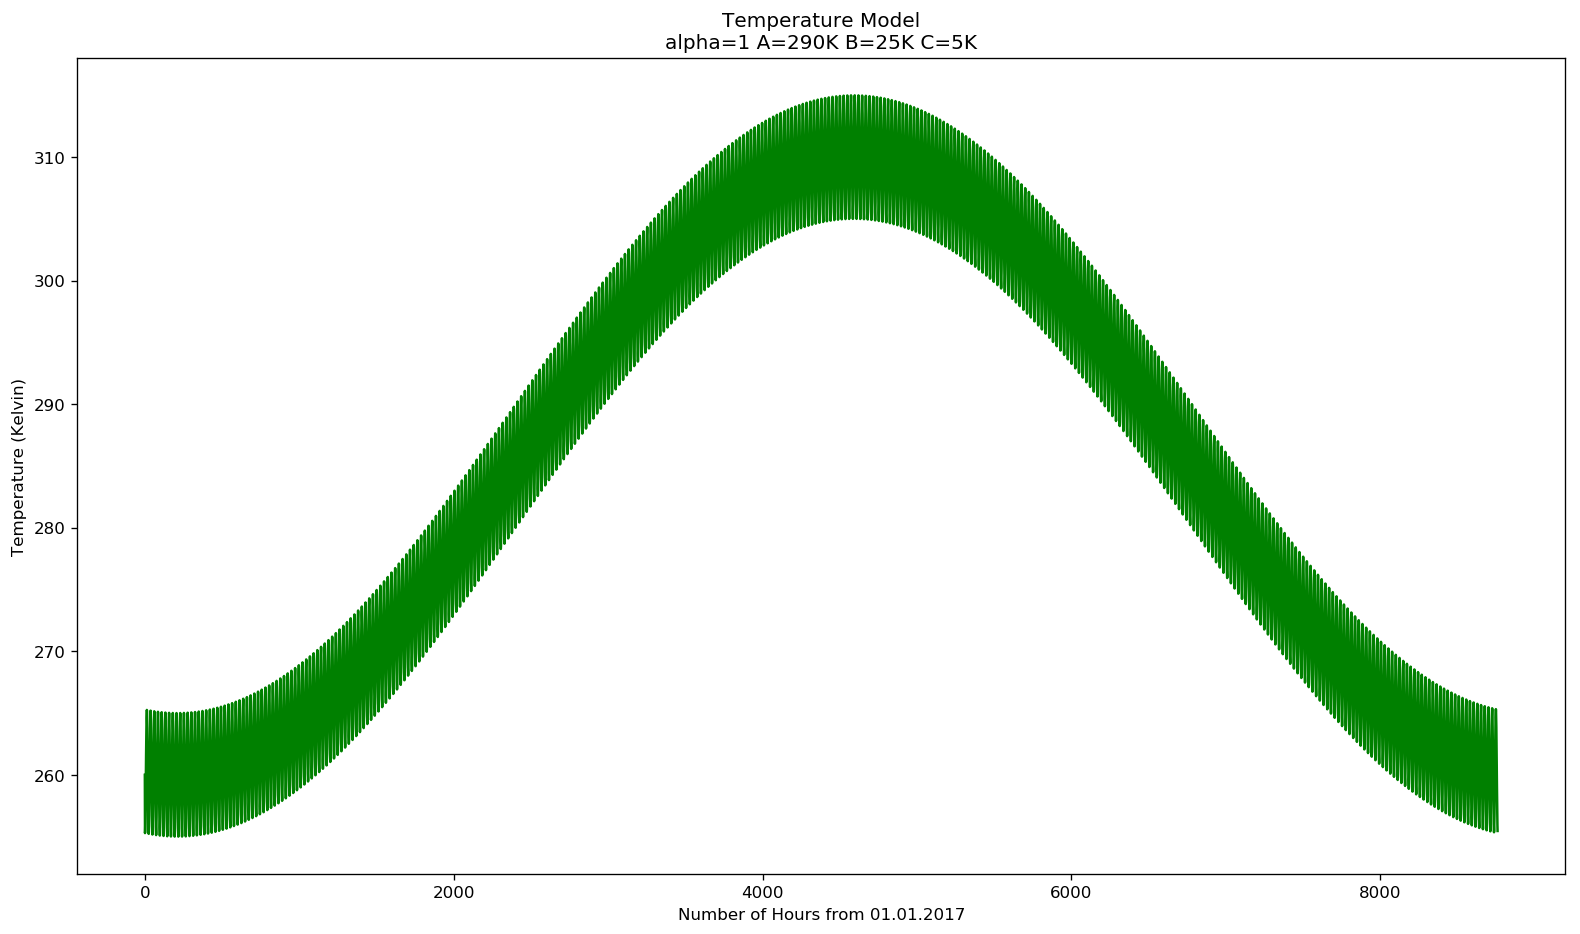

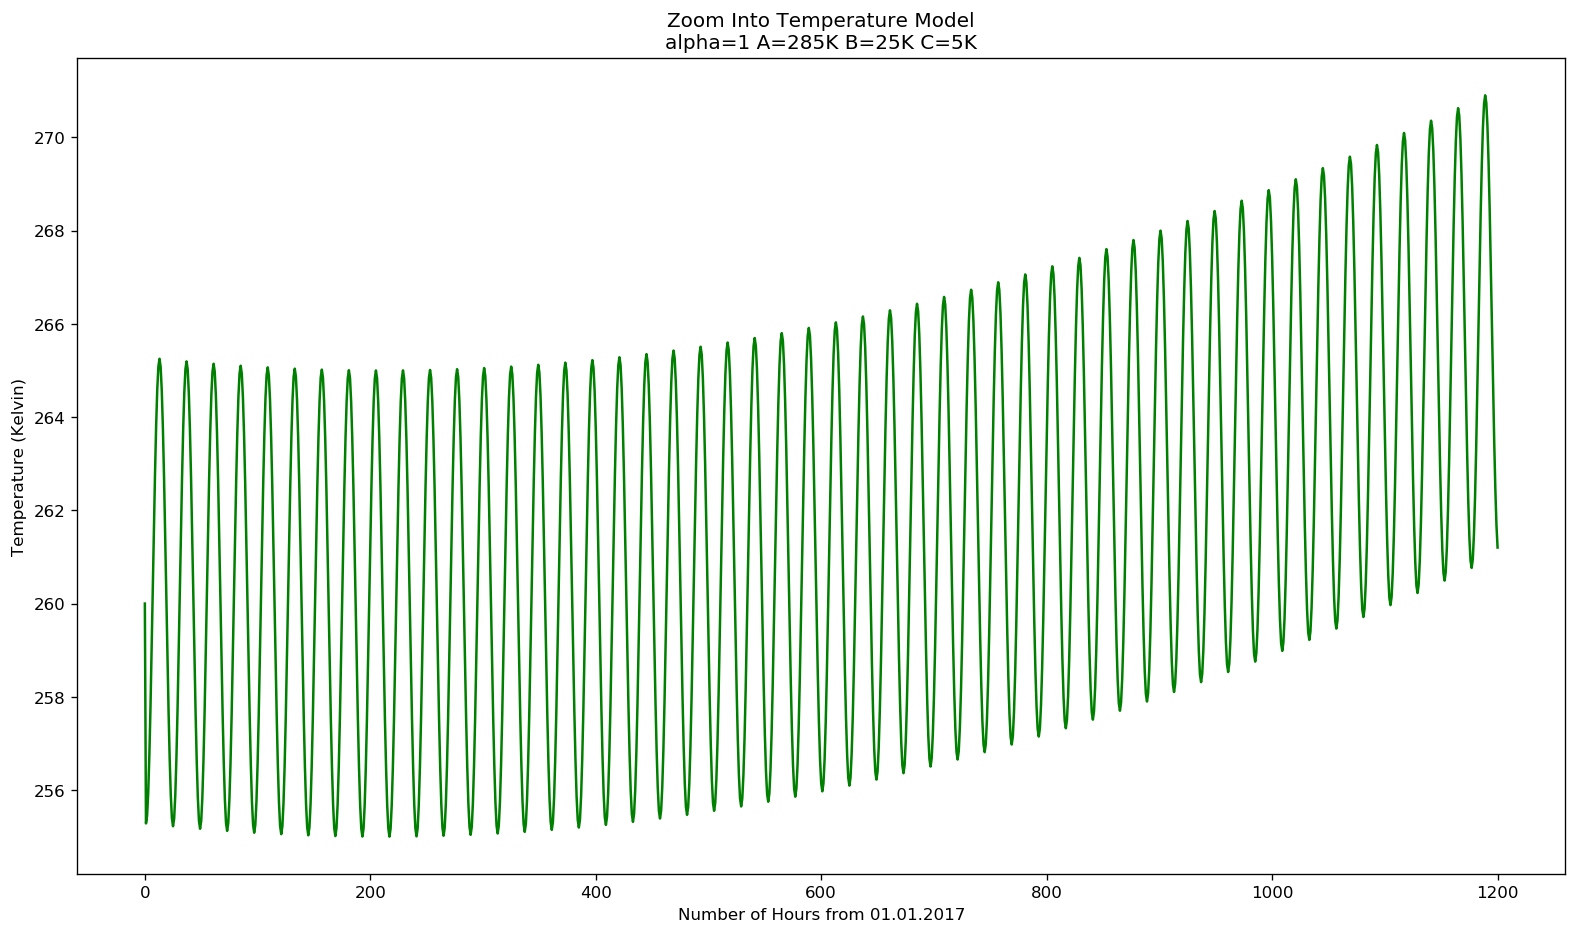

In [126]:
def euler_solve(alpha, a, b, c, time_start, temp_start, time_end, step_size):
    num_iterations = (time_end - time_start + 1) / step_size
    time = np.arange(time_start, time_end + 1, step_size)
    temp = np.zeros(int(num_iterations), dtype=float)
    temp[0] = temp_start
    for i in range(1, int(num_iterations)):
        cooling = -1 * alpha * temp[i - 1]
        heating = heating_function(time[i - 1], a, b, c)
        temp[i] = temp[i - 1] + step_size * (cooling + heating)
    return temp


time_range = np.arange(0 * 24, 365 * 24 + 1, 1)
temp = euler_solve(
    alpha=1,
    a=285,
    b=25,
    c=5,
    time_start=0 * 24,
    temp_start=260,
    time_end=365 * 24,
    step_size=1)
plt.figure(2, figsize=(16, 9), dpi=1920 / 16)
plt.title("Temperature Model\nalpha=1 A=290K B=25K C=5K")
plt.plot(time_range, temp, color="green", linestyle="solid")
plt.xlabel("Number of Hours from 01.01.2017")
plt.ylabel("Temperature (Kelvin)")
plt.show()

time_range = np.arange(0 * 24, 50 * 24 + 1, 1)
temp = euler_solve(
    alpha=1,
    a=285,
    b=25,
    c=5,
    time_start=0 * 24,
    temp_start=260,
    time_end=50 * 24,
    step_size=1)
plt.figure(2, figsize=(16, 9), dpi=1920 / 16)
plt.title("Zoom Into Temperature Model\nalpha=1 A=285K B=25K C=5K")
plt.plot(time_range, temp, color="green", linestyle="solid")
plt.xlabel("Number of Hours from 01.01.2017")
plt.ylabel("Temperature (Kelvin)")
plt.show()

<font color="green">**3. Собирање на вистински податоци за температурата во Скопје во 2017 година на секои 3 часа. Споредување на моделот со податоците.<br/>Извор: <a>https://rp5.ru/Weather_archive_in_Skopje,_Petrovec_(airport)</a>**</font>
$$
\alpha \approx 1 \\
А \approx \overline{T_{\textrm{real}}}\\
B \approx \frac{\max{T_{\textrm{real}}} - \min{T_{\textrm{real}}}}{4}\\
C \textrm{ е исто како B но пресметано на некое полокално ниво т.е.}\\
C \approx \frac{\max_{a \leq t \leq b}{T_{\textrm{real}}(t)} - \min_{a \leq t \leq b}{T_{\textrm{real}}(t)}}{4}
$$

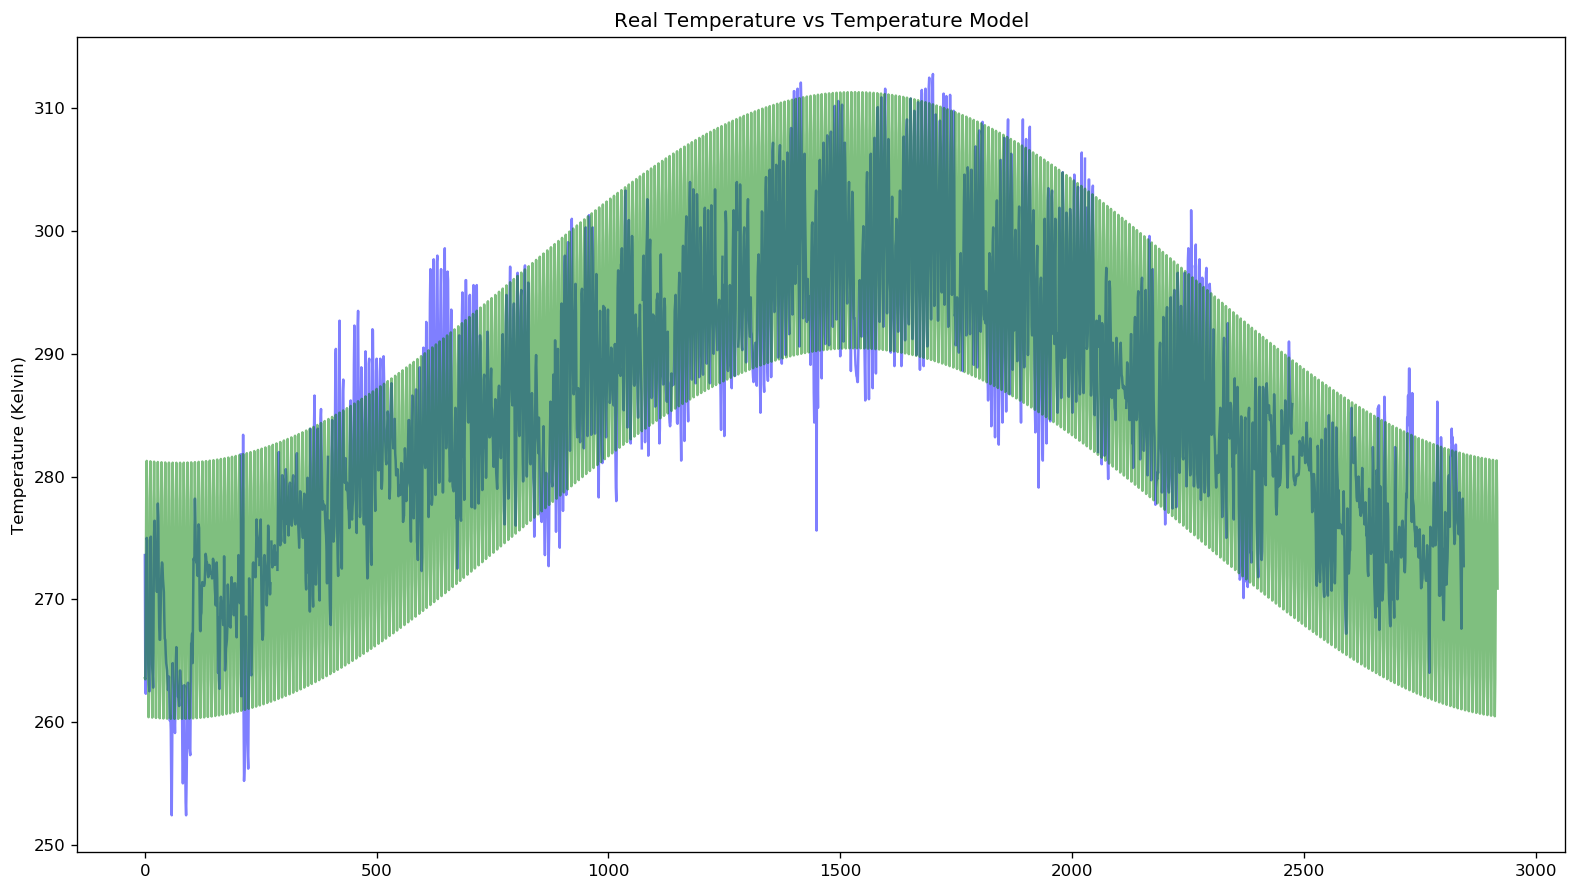

In [127]:
dataset = pandas.read_csv(
    "13586.01.01.2017.31.12.2017.1.0.0.en.utf8.00000000.csv",
    delimiter=";",
    header=0,
    index_col=False)
real_temp = list(dataset["T"])
real_temp.reverse()
real_temp = [temp + 273 for temp in real_temp]
time_range = np.arange(0 * 24, 365 * 24 + 1, 1)
temp = euler_solve(
    alpha=1,
    a=np.nanmean(real_temp),
    b=(max(real_temp) - min(real_temp)) / 4,
    c=(max(real_temp[1500:2500]) - min(real_temp[1500:2500])) / 4,
    time_start=0 * 24,
    temp_start=270,
    time_end=365 * 24,
    step_size=1)

temp = [(temp[i] + temp[i + 1] + temp[i + 2]) / 3
        for i in range(0 * 24, 365 * 24 - 3, 3)]
plt.figure(1, figsize=(16, 9), dpi=1920 / 16)
plt.title("Real Temperature vs Temperature Model")
plt.plot(real_temp, color="blue", linestyle="solid", alpha=0.5)
plt.plot(temp, color="green", linestyle="solid", alpha=0.5)
plt.ylabel("Temperature (Kelvin)")
plt.show()

<font color="green">**4. Пресметување на Фуриева трансформација на низата од вистински температури.**</font>

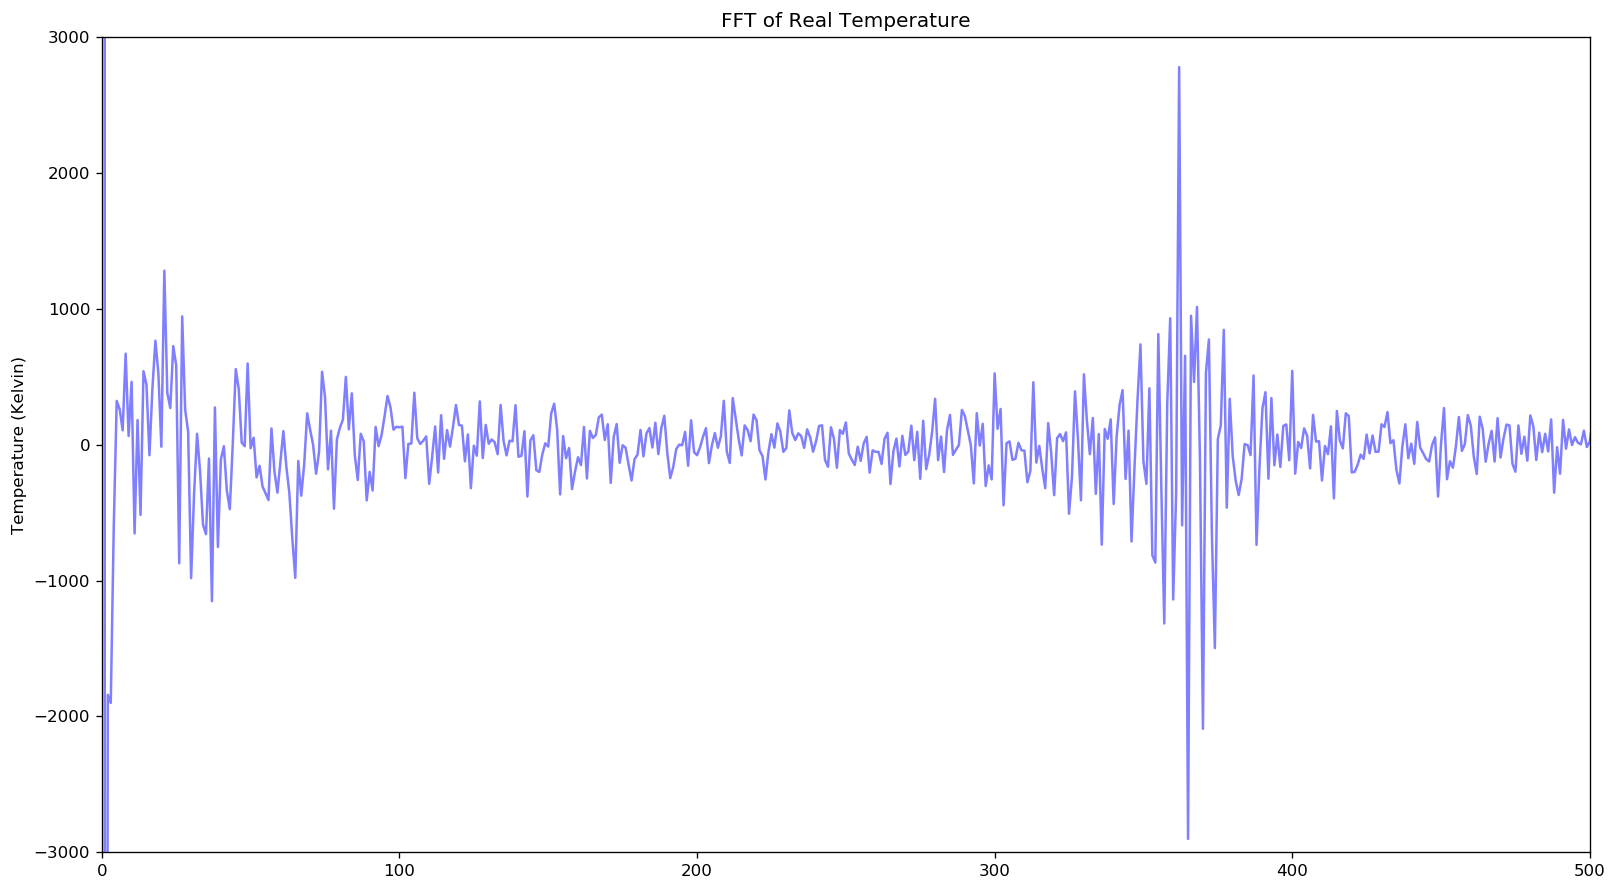

In [128]:
real_temp = [temp for temp in real_temp if not np.isnan(temp)]
real_temp_fft = np.fft.rfft(real_temp)
plt.figure(1, figsize=(16, 9), dpi=1920 / 16)
plt.title("FFT of Real Temperature")
plt.plot(real_temp_fft, color="blue", linestyle="solid", alpha=0.5)
plt.ylabel("Temperature (Kelvin)")
plt.xlim(0, 500)
plt.ylim(-3000, 3000)
plt.show()

<font color="green">**5. Моделирање на температурата со најчестите фрекфенции.**</font>

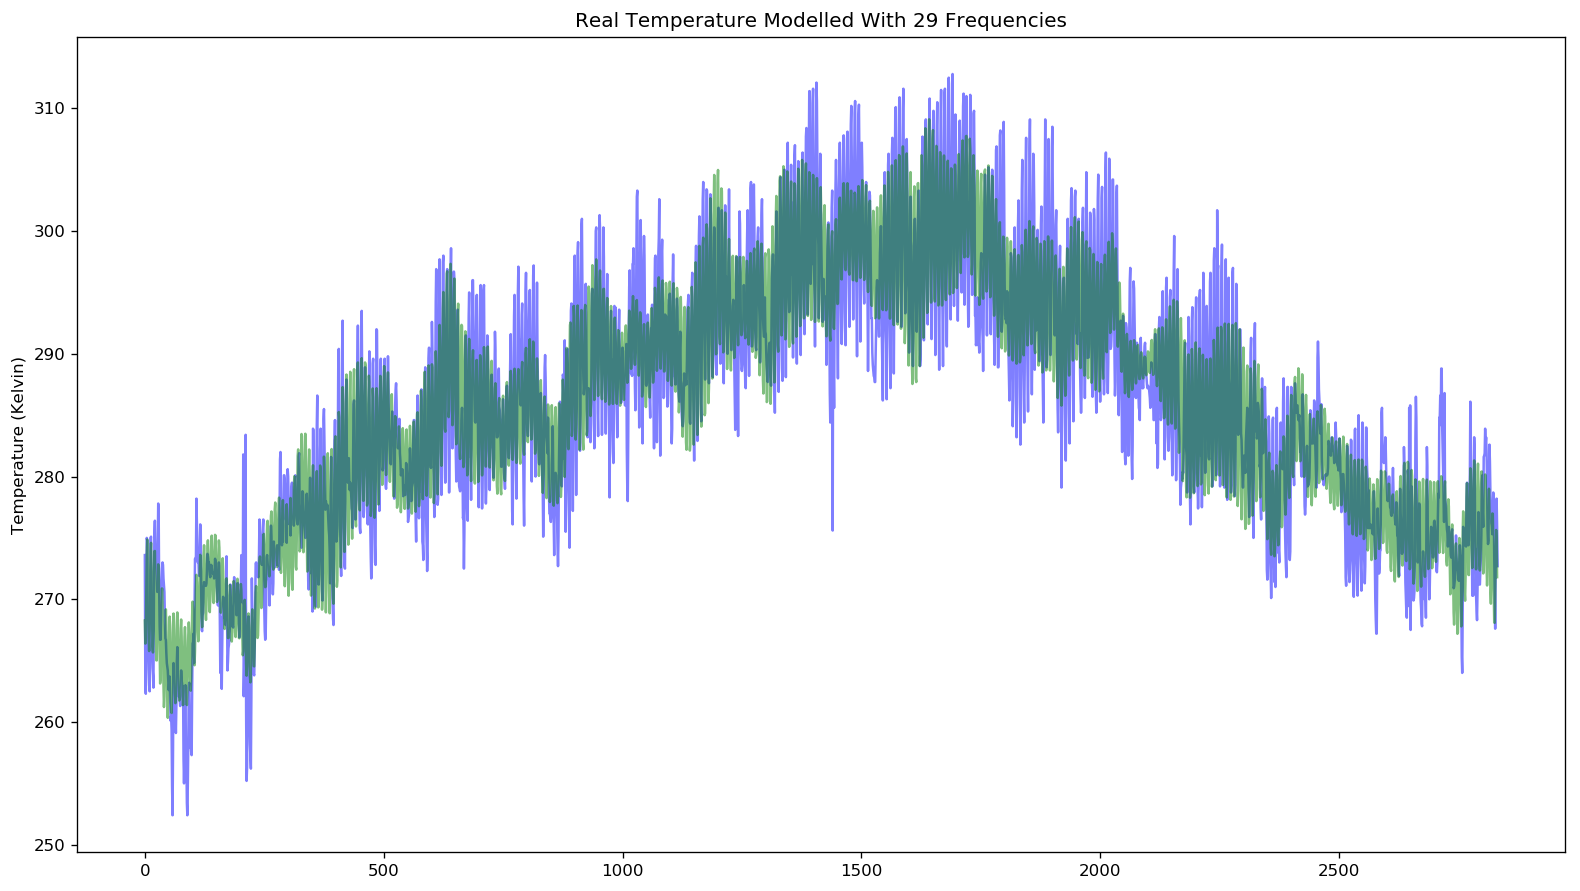

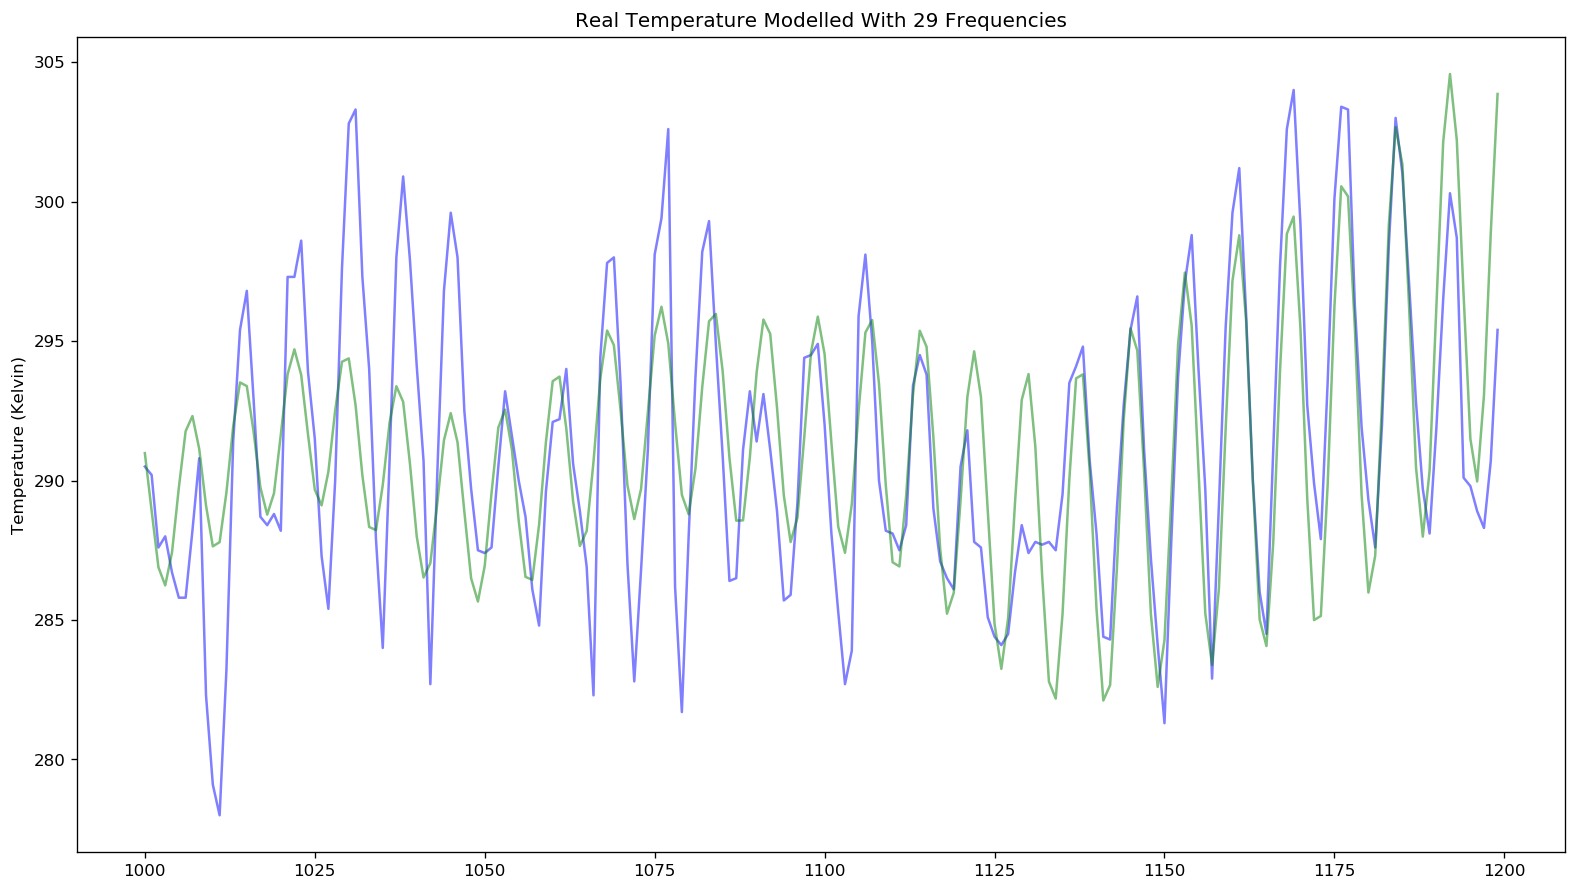

In [133]:
best_frequencies = []
threshold = 1000
num_freq = 0
for freq in real_temp_fft:
    if np.abs(freq) > threshold:
        best_frequencies.append(freq)
        num_freq += 1
    else:
        best_frequencies.append(0)

plt.figure(1, figsize=(16, 9), dpi=1920 / 16)
plt.title("Real Temperature Modelled With " + str(num_freq) + " Frequencies")
plt.plot(real_temp, color="blue", linestyle="solid", alpha=0.5)
plt.plot(
    np.fft.irfft(best_frequencies),
    color="green",
    linestyle="solid",
    alpha=0.5)
plt.ylabel("Temperature (Kelvin)")
plt.show()

plt.figure(1, figsize=(16, 9), dpi=1920 / 16)
plt.title("Real Temperature Modelled With " + str(num_freq) + " Frequencies")
plt.plot(
    range(1000, 1200),
    real_temp[1000:1200],
    color="blue",
    linestyle="solid",
    alpha=0.5)
plt.plot(
    range(1000, 1200),
    np.fft.irfft(best_frequencies)[1000:1200],
    color="green",
    linestyle="solid",
    alpha=0.5)
plt.ylabel("Temperature (Kelvin)")
plt.show()